In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

In [3]:
from skimage import data
from skimage import transform
from skimage import img_as_float

In [4]:
#read image
image = cv2.imread('image.jpg')

In [5]:
#Implementing a curve filter using lookup table
def spreadLookupTable(x, y):
  spline = UnivariateSpline(x, y)
  return spline(range(256))

In [6]:
#create warm effect  
def warmImage(image):
    increaseLUT = spreadLookupTable([0, 64, 128, 256], [0, 80, 160, 256])
    decreaseLUT = spreadLookupTable([0, 64, 128, 256], [0, 50, 100, 256])
    red_c, green_c, blue_c = cv2.split(image)
    red_c = cv2.LUT(red_c, decreaseLUT).astype(np.uint8)
    blue_c = cv2.LUT(blue_c, increaseLUT).astype(np.uint8)
    return cv2.merge((red_c, green_c, blue_c))

In [7]:
cvt_img = warmImage(image)

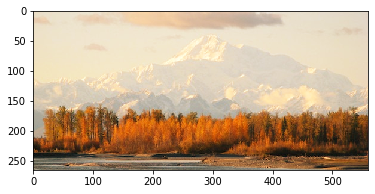

In [8]:
plt.imshow(cvt_img[:,:,::-1])

In [9]:
#Implementing a curve filter using lookup table
def spreadLookupTable(x, y):
  spline = UnivariateSpline(x, y)
  return spline(range(256))

In [10]:
#create cold effect  
def coldImage(image):
    increaseLUT = spreadLookupTable([0, 64, 128, 256], [0, 80, 160, 256])
    decreaseLUT = spreadLookupTable([0, 64, 128, 256], [0, 50, 100, 256])
    red_c, green_c, blue_c = cv2.split(image)
    red_c = cv2.LUT(red_c, increaseLUT).astype(np.uint8)
    blue_c = cv2.LUT(blue_c, decreaseLUT).astype(np.uint8)
    return cv2.merge((red_c, green_c, blue_c))


In [11]:
cvt_img = coldImage(image)

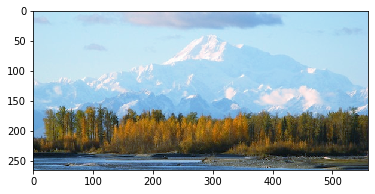

In [12]:
plt.imshow(cvt_img[:,:,::-1])

In [13]:
#read img & covert to gray
img_rgb = cv2.imread("image.jpg")
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

In [14]:
#blur
img_gray_inv = 255 - img_gray
img_blur = cv2.GaussianBlur(img_gray_inv, ksize=(21, 21),
                            sigmaX=0, sigmaY=0)

In [15]:
def dodgeNaive(image, mask):
  # determine the shape of the input image
  width,height = image.shape [:2] 

  # prepare output argument with same size as image
  blend = np.zeros((width,height), np.uint8)

  for col in xrange(width):
    for row in xrange(height):
      if mask[c,r] == 255:
        blend[c,r] = 255
      else:
        tmp = (image[c,r] << 8) / (255-mask)

        if tmp > 255:
          tmp = 255
          blend[c,r] = tmp

  return blend

In [16]:
def burnV2(image, mask):
  return 255 - cv2.divide(255-image, 255-mask, scale=256)

In [17]:
#blend gray vs blur
def dodgeV2(image, mask):
  return cv2.divide(image, 255-mask, scale=256)

In [18]:
cvt_img = dodgeV2(img_gray, img_blur)

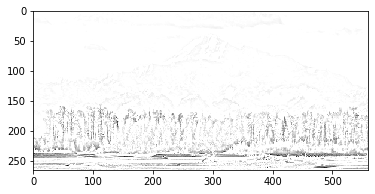

In [19]:
plt.imshow(cvt_img,cmap=plt.cm.gray)

In [20]:
#sharpen
def sharpen(image):
    kernel = np.array([[-1, -1, -1], 
                       [-1, 9, -1], 
                       [-1, -1, -1]])
    return cv2.filter2D(image, -1, kernel)

In [21]:
cvt_img = sharpen(image)

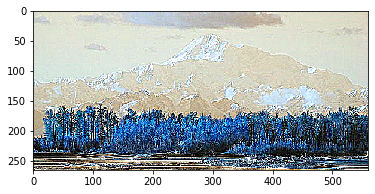

In [22]:
plt.imshow(cvt_img[:,:,::-1])

In [159]:
#emboss
def emboss(image):
    kernel = np.array([[0,-1,-1],
                       [1,0,-1],
                       [1,1,0]])
    return cv2.filter2D(image, -1, kernel)

In [160]:
cvt_img = emboss(image)

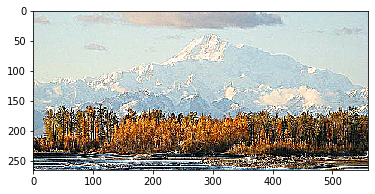

In [23]:
plt.imshow(cvt_img[:,:,::-1])

In [24]:
cvt_img = np.array(image) 

In [25]:
a= int(image.shape[0]*0.33)
b= int(image.shape[0]*0.66)
space = int(image.shape[0]*0.025)

In [26]:
for i in range(0, image.shape[0]):
    if i in range(a,a +space) or i in range(b, b+ space):
        for j in range(0, image.shape[1]):
            cvt_img[i][j]=(255,255,255)

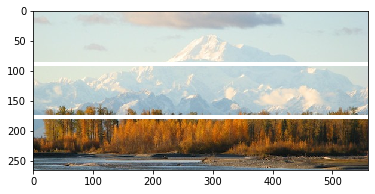

In [27]:
plt.imshow(cvt_img[:,:,::-1])

In [28]:
cvt_img2 = np.array(image)

In [29]:
for i in range(0, image.shape[1]):
    for j in range(0, image.shape[0],2):
        cvt_img2[j][i]=(255,255,255)

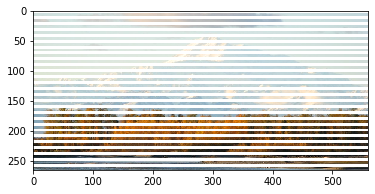

In [30]:
plt.imshow(cvt_img2[:,:,::-1])

In [31]:
image2= cv2.imread('image.jpg')

In [32]:
arr = np.array(image2)

In [33]:
mirror = np.array(arr,dtype=int,copy=True,order='F')

In [34]:
a= image2.shape[0]

In [35]:
for i in range(0, image2.shape[0]):
    for j in range(0, image2.shape[1]):
        mirror[a-i-1][j]= arr[i][j]

In [36]:
cvt_img= np.concatenate((arr, mirror))

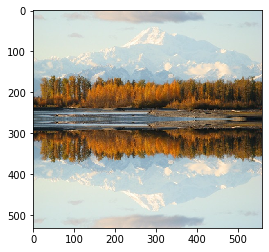

In [37]:
plt.imshow(cvt_img[:,:,::-1])

In [38]:
cvt_img = cv2.GaussianBlur(image,(25,25),0)

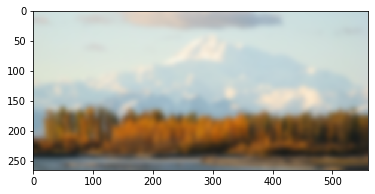

In [39]:
plt.imshow(cvt_img[:,:,::-1])

In [40]:
trans = transform.AffineTransform(
     shear=0.08,
)

In [41]:
cvt_img = transform.warp(image, trans.inverse)

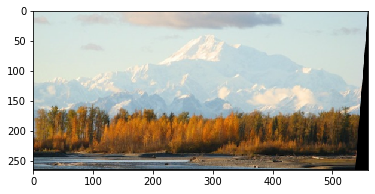

In [42]:
plt.imshow(cvt_img[:,:,::-1])

In [43]:
#edge smoothing use bilateral filter
img_color=cv2.bilateralFilter(image,9,9,7)


In [44]:
#cvt to grayscale & median  blur
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(img_gray,7)

In [45]:
#create edge mask
#detect and enhance edges
img_edge = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,2)


In [46]:
#convert to color
img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
cvt_img = cv2.bitwise_and(img_color, img_edge)

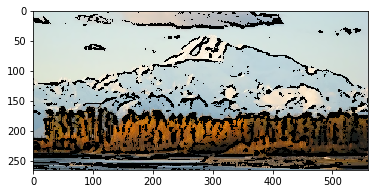

In [47]:
plt.imshow(cvt_img[:,:,::-1])

In [48]:
cvt_img = cv2.bitwise_not(image)

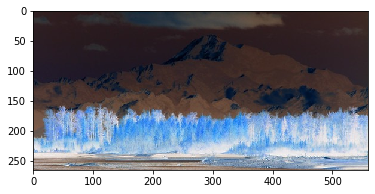

In [49]:
plt.imshow(cvt_img[:,:,::-1])

In [132]:
#apply morphology open to smooth the outline
cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (40,40))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [133]:
morph = cv2.morphologyEx(image, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (40,40)))

In [134]:
#brighten dark regions
cvt_img = cv2.normalize(morph,None,20,255,cv2.NORM_MINMAX)

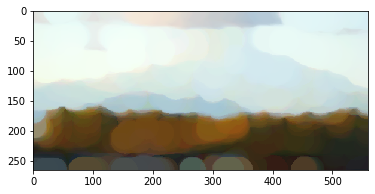

In [135]:
plt.imshow(cvt_img[:,:,::-1])

In [136]:
gray= cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

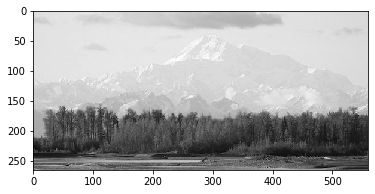

In [137]:
plt.imshow(gray, cmap ='gray')